## Project on FMT By Bappa Bhalsing

### 1. Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### 2. Load The Data

In [2]:
df_cement=pd.read_csv('concrete (1).csv')
df_cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df_cement.shape

(1030, 9)

Data frame has 1030 rows and 9 Columns

### 3. Univariate Analysis

In [3]:
df_cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No missing value in the data frame and dtypes had 8 float type and one integer type

In [4]:
df_cement.isna().sum().sum()

0

In [5]:
df_cement.isnull().sum().sum()

0

Cross verification of Na or Null value done , no such case observed.

In [6]:
df_cement.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Conclusion**
##### Cement colunms has mean near to median expected and standard deviation equivalent to minimum value indicates non normal distribution and presence of outliers.
##### Slag and ash colunm clearly indicates presence of outlier as mean and median has no near correlation
##### Remaining attributes have equivalent value of mean and median so chances of presence of outlier is very minimal.
**Important**
-The three attribute have minimum values of Zero indicates missing value.i.e Blast Furnace Slag, Fly Ash & SuperPlasticizer, this is an error or data missing.

In [7]:
# Zero value of 3 attributes need to replace with mean
df_cem=df_cement.mask(df_cement==0).fillna(df_cement.mean())

In [8]:
df_cem.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375000,272.900000,350.000,540.0
slag,1030.0,107.687023,61.658049,11.00,73.895825,73.895825,142.950,359.4
ash,1030.0,83.965637,39.911375,24.50,54.188350,54.188350,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900000,185.000000,192.000,247.0
superplastic,1030.0,8.487734,4.036065,1.70,6.204660,6.400000,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000000,968.000000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950000,779.500000,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000000,28.000000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710000,34.445000,46.135,82.6


This method used for to check any abnornality in the data frame

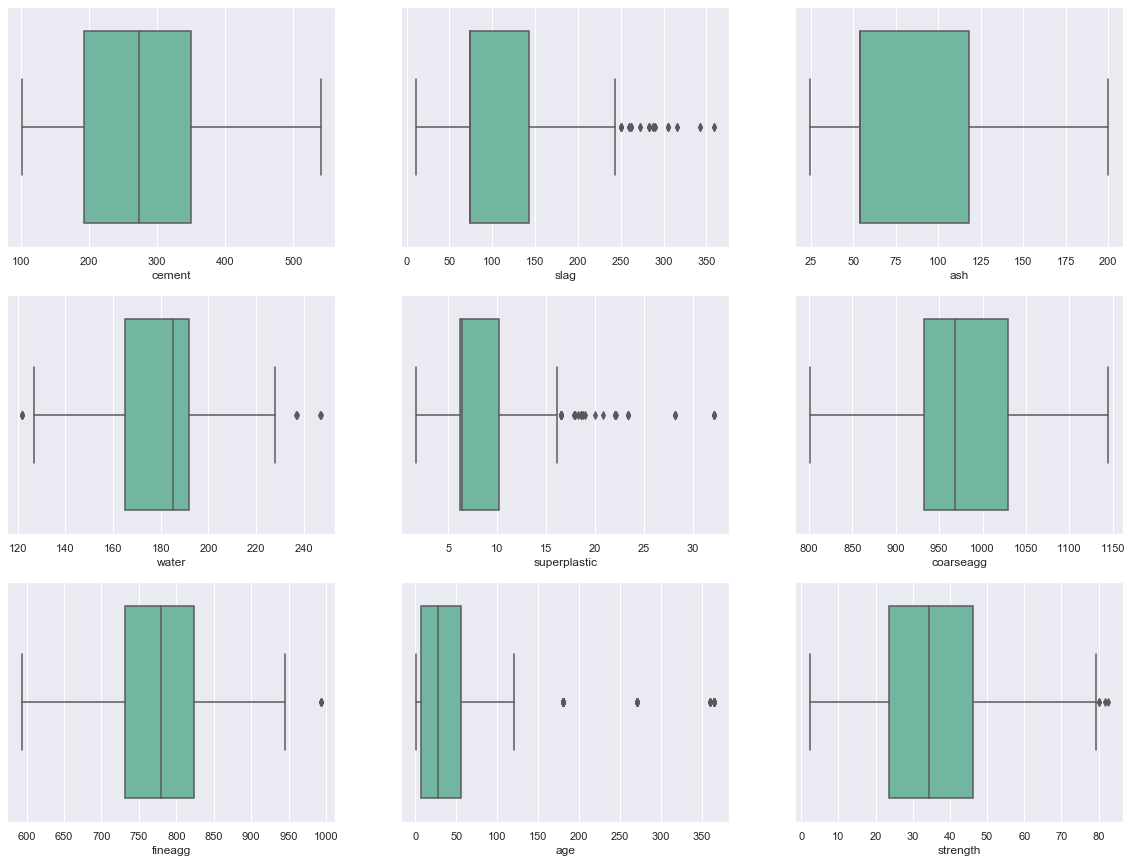

In [9]:
# Checking outliers using Box Plot
plt.figure(figsize= (20,15))
pos=1
for i in df_cem.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df_cem[i],palette='Set2')
    pos += 1

**Conclusion of Box Plot**
##### Outliers clearly visible in Blast Furnace Slag, Water, Superplasticizer, Fine Aggregate & strenght attributes

### 4. Handling Outliers

In [10]:
df_cem.columns[:8]

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [11]:
# Replacing outliers with median of attribute
from scipy.stats import iqr
from scipy import stats
for col_name in df_cem.columns[:8]:
    Q1 = df_cem[col_name].quantile(0.25)
    Q3 =df_cem[col_name].quantile(0.75)
    IQR = Q3 - Q1
    df_cem.loc[((df_cem[col_name] < (Q1 - 1.5 * IQR)) |(df_cem[col_name] > (Q3 + 1.5 * IQR))),col_name] = df_cem[col_name].median()
    

In [12]:
#df_concret = df_cem[~((df_cem < (Q1 - 1.5 * IQR)) |(df_cem > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_concret.shape

In [13]:
df_concret=df_cem
df_concret.shape

(1030, 9)

Outliers are replace with median value without removing them from data frame

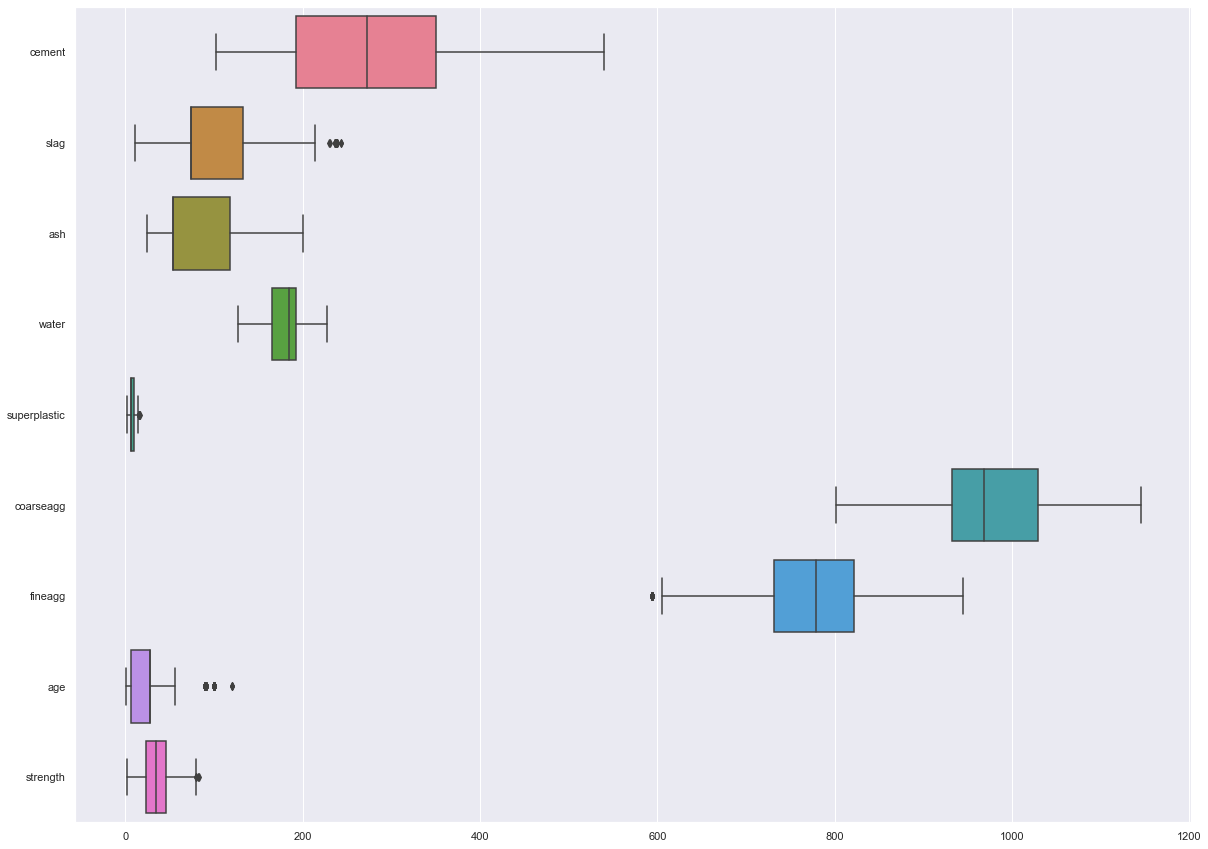

In [14]:
#Rechecking outliers in data
plt.figure(figsize= (20,15))
sns.boxplot(data=df_concret, orient="h", palette="husl")

- All data has been cleaned and no significant outliers present in data set; some of attribute showing outliers but we need ignore them as it does not make significant impact on further process

In [15]:
# 5 point summary for data clarification
df_concret.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,100.492124,83.965637,181.653107,7.753851,972.918932,772.546019,32.256311,35.817961
std,104.506364,51.767932,39.911375,20.603205,2.580719,77.753954,78.703232,27.803705,16.705742
min,102.000000,11.000000,24.500000,126.600000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,73.895825,54.188350,164.900000,6.204660,932.000000,730.950000,7.000000,23.710000
50%,272.900000,73.895825,54.188350,185.000000,6.400000,968.000000,779.400000,28.000000,34.445000
75%,350.000000,132.400000,118.300000,192.000000,9.600000,1029.400000,822.200000,28.000000,46.135000
max,540.000000,243.500000,200.100000,228.000000,16.100000,1145.000000,945.000000,120.000000,82.600000


Data frame size has been balance and 1030 Rows after handling outliers.

### 5. Feature Engineering Technique

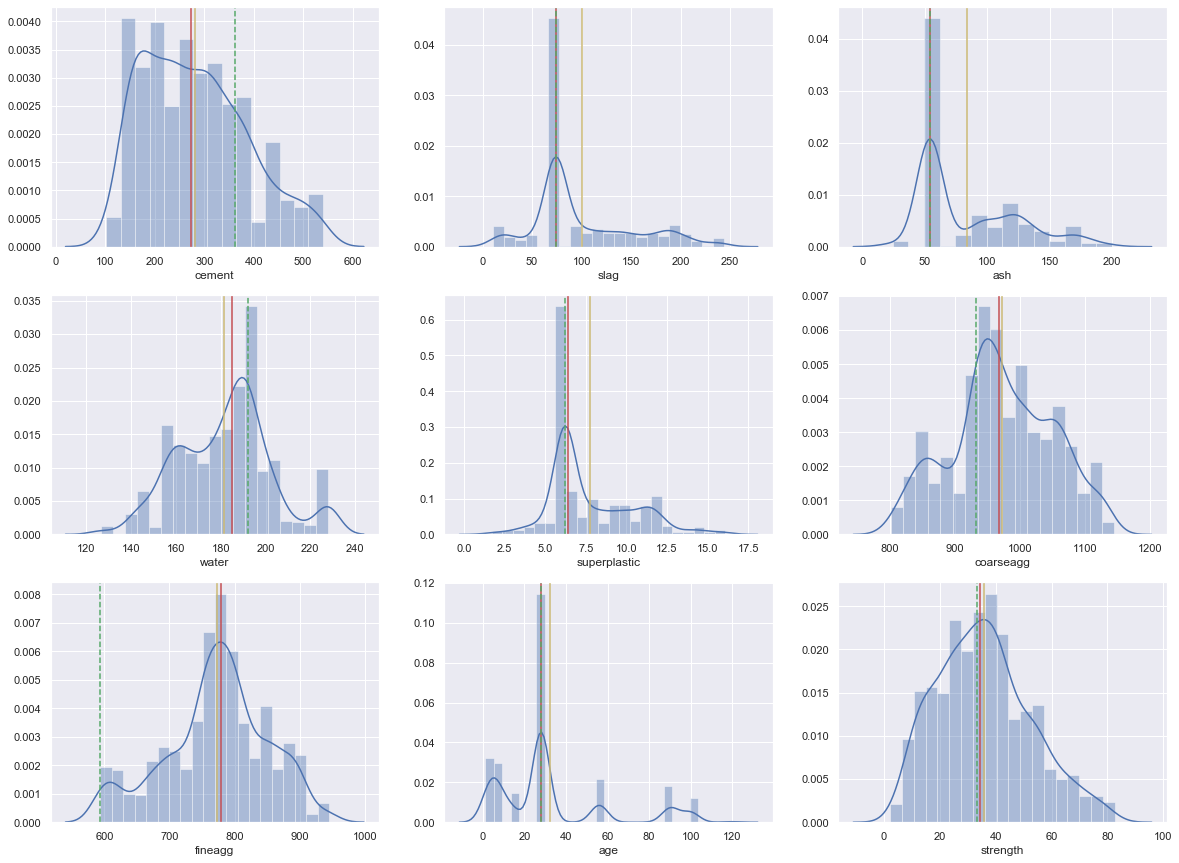

In [16]:
# Ploting Histomgram with Mean, Mode and Medial line to analyse for distribution
plt.figure(figsize= (20,15))
pos=1
for i in df_concret.columns:
    plt.subplot(3,3,pos)
    sns.distplot(df_concret[i])
    plt.axvline(df_concret[i].mean(), color='y')
    plt.axvline(df_concret[i].median(), color='r')
    plt.axvline(df_concret[i].mode()[0], color='g', linestyle='--')
    pos += 1

**Inference**
##### Ditribution of Cement, Coaseagg, Fineagg & strenght attributes is normal in nature as mean, median and mode are found in equivalent zone.
##### Double Gausian found in water, Superplastic and Slag attributes.
##### Fine agg attribute have mode value away from mean and median indiacates data has less correlation with strenght

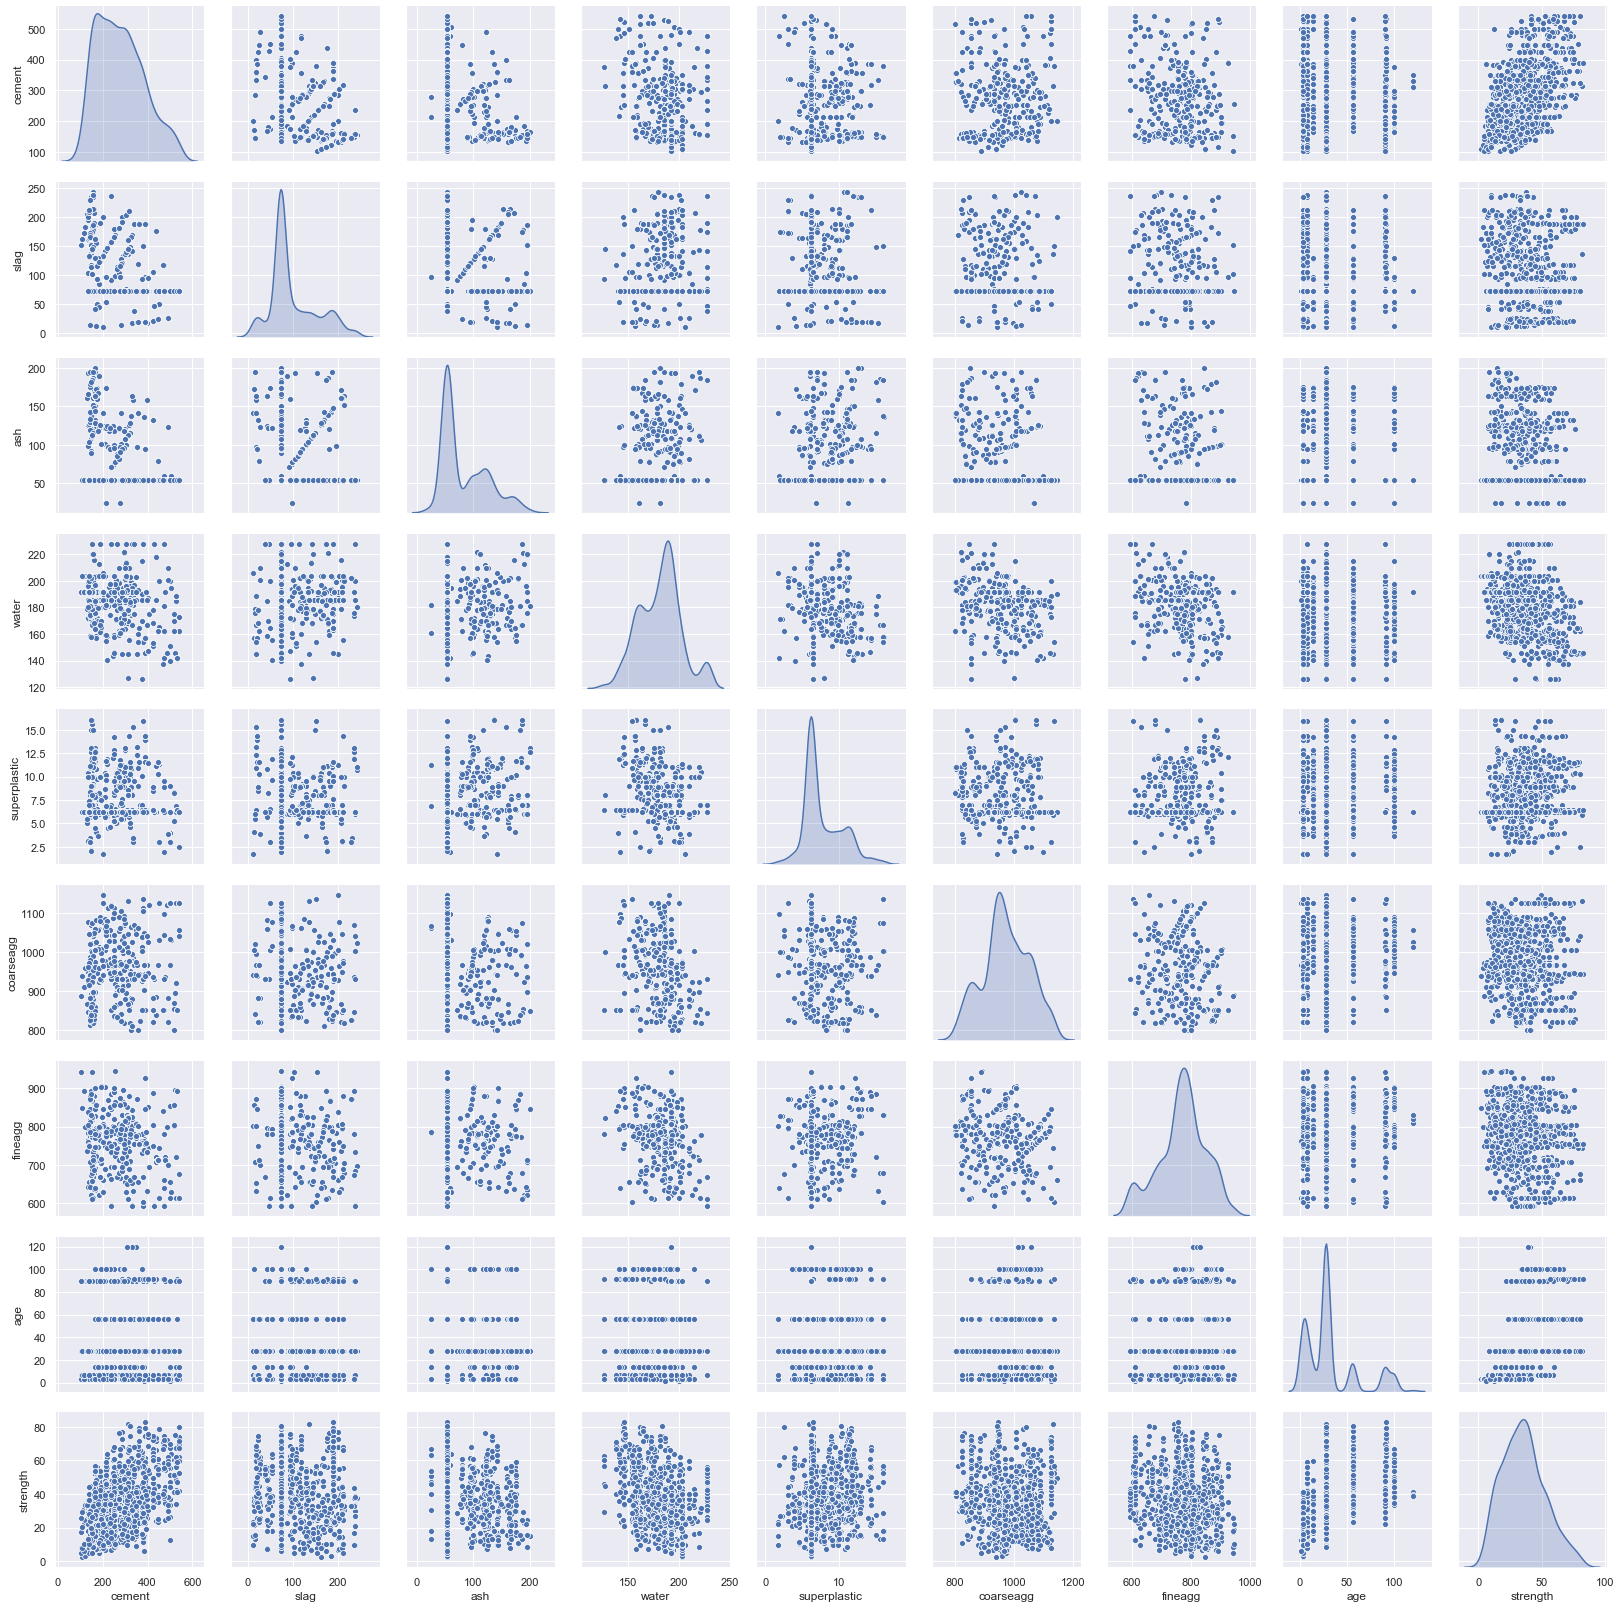

In [17]:
sns.pairplot(df_concret, diag_kind='kde')

**Inference**
##### Strenght and Cement have seen highest positive correlation than otherattributes
##### Strenght having slightly neagtive correlation with water.
##### Cement, Coarse Agg, Fine agg & strenght distribution is normal in nature.
##### Age, Superplastic & Ash attributes have found multiple guassian.
##### Rest of Data with others not seen any strong relation
##### 8 to 9 cluster are likely to be in the data set attract K mean Clustering Technique to anyalyse cluster base analysis

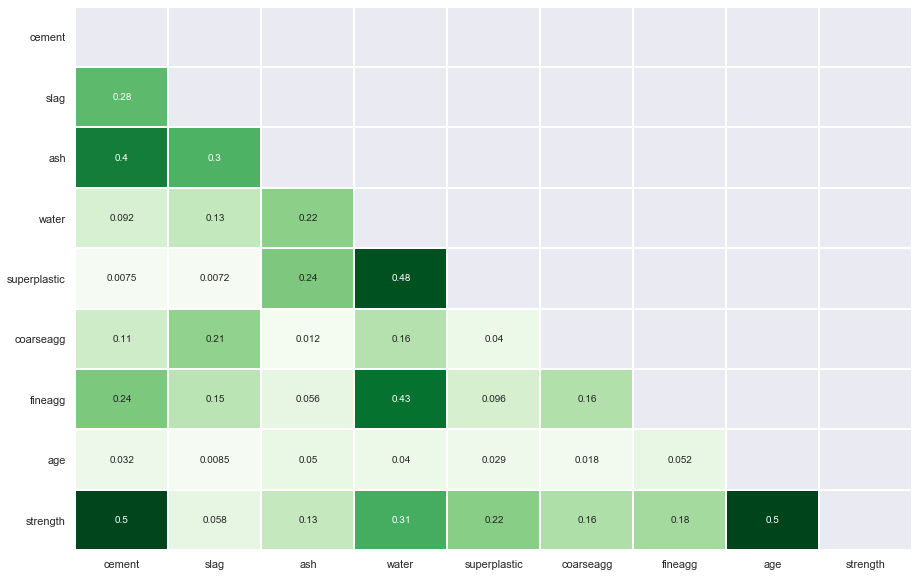

In [18]:
# Corellation of data with each other
corr=abs(df_concret.corr())
lower_triangle = np.tril(corr, k = -1)
mask=lower_triangle==0
plt.figure(figsize=(15,10))
sns.heatmap(lower_triangle,cmap= 'Greens', annot=True,xticklabels = corr.index, yticklabels = corr.columns,cbar= False, linewidths= 1, mask=mask);
plt.yticks(rotation = 0)
plt.show()

**Inference**
##### Superplatisizer have highest correlation with Water content in Concrete followed by Age with strenght of concrete
##### Cement, Water , Superplastisizer are directly correlated with Strenght
##### Fina Agg, Coaseagg and Slag attribute show minimal correlation with non significant in nature

### 6.Splitting Data

In [19]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [20]:
# Creat new data frame after apllying Z Score
df_concretz=df_concret.apply(zscore)

X = df_concretz.drop('strength', axis=1)
y = df_concretz['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 7. SVM Model

In [21]:
from sklearn import svm
clr = svm.SVR(kernel='linear')  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = clr.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


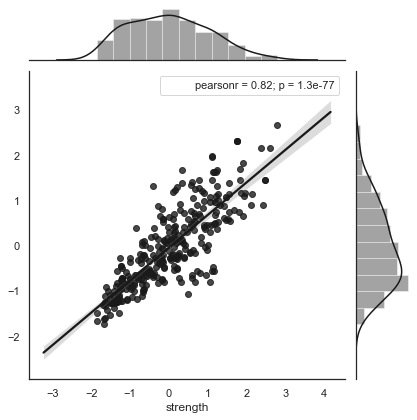

In [23]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr, kind="reg", color="k");
    

- Prediction ditribution with Target attribute is not normal  as pearson Correlation value is 82 %

In [29]:
Accuracy=clr.score(X_test, y_test)
# performance on train data
print('Performance of SVR on training data :',clr.score(X_train,y_train), )
# performance on test data
print('Performance of SVR on Testing data :',Accuracy)

Performance of SVR on training data : 0.7017257131256784
Performance of SVR on Testing data : 0.6740590097712483


In [30]:
results = pd.DataFrame({'Model':['SVM SVR'], 'Accuracy': Accuracy},index={'1'})
results = results[['Model', 'Accuracy']]

Inference - The accuracy is 67.4 % and distribution is right tailed attract another iteration

####  Iteration 2 on SVR

In [31]:
# Creat new X1 after dropping attribute
X1=X.drop('ash',axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=1)

In [32]:
clr.fit(X1_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
y1_pred = clr.predict(X1_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


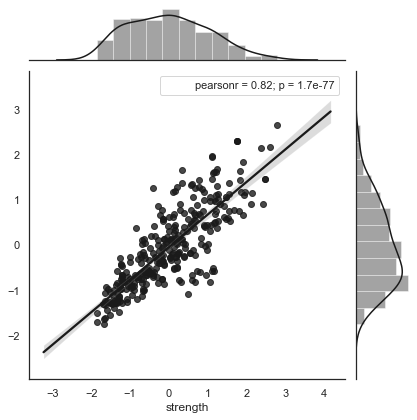

In [34]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y1_pred, stat_func=pearsonr, kind="reg", color="k");

In [35]:
Accuracy1=clr.score(X1_test, y_test)
print('Performance of SVR after iteration on training data :',clr.score(X1_train,y_train))
# performance on test data
print('Performance of SVR after iteration on Testing data :',Accuracy1)

Performance of SVR after iteration on training data : 0.7006790590122874
Performance of SVR after iteration on Testing data : 0.6729154342348337


In [36]:
SVRit2df = pd.DataFrame({'Model':['SVR IT2'], 'Accuracy': [Accuracy1]},index={'2'})
results = pd.concat([results, SVRit2df])
results = results[['Model', 'Accuracy']]

##### After 2 iteration no improvement in the score
### K Fold on SVR

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
svm_kfold=cross_val_score(clr,X,y, cv=kfold)
Accuracyko=np.mean(abs(svm_kfold))
print('Average accuracy: ',Accuracyko)
print('Standard Deviation: ',svm_kfold.std())
SVRKfold = pd.DataFrame({'Model':['SVR K Fold'], 'Accuracy': [Accuracyko]},index={'3'})
results = pd.concat([results, SVRKfold])
results = results[['Model', 'Accuracy']]

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.6808872326047715
Standard Deviation:  0.04513216844750201


- No variation found after K Fold Cross Validation on SVR

### 8. K Mean Clustering

In [39]:
# To check Guassian in data
from sklearn.cluster import KMeans
cluster_range = range( 2, 9 )   # expect 8 to 9 clusters from the pairplot inference so limit the cluster range between 2 to 9
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_concret)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.092908e+07
1,3,1.791104e+07
2,4,1.516293e+07
3,5,1.340220e+07
4,6,1.234698e+07
5,7,1.116087e+07
6,8,1.032578e+07


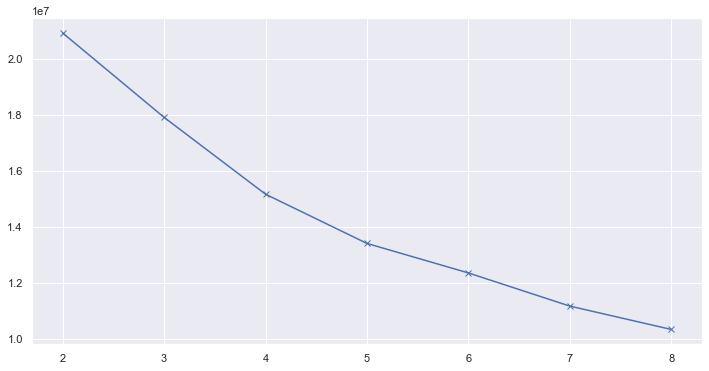

In [40]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "x" )

Elbow plot indicates 5 clusters are suitable size

In [41]:
cluster = KMeans( n_clusters = 5, random_state = 1)
cluster.fit(df_concretz)

prediction=cluster.predict(df_concretz)
df_concretz["Group"] = prediction     # Creating a new column kmean which will hold the cluster id of each record

In [42]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.92874654,  0.16573254, -0.34568706, -0.96463385,  0.83606175,
        -0.71586745,  0.28700297,  0.08854452,  1.08091324],
       [ 1.26265515, -0.5168188 , -0.56696937,  1.1059578 , -0.65177691,
         0.13825669, -1.52878564,  0.10700813,  0.62529162],
       [-0.03188608, -0.44369724, -0.45334606,  0.43955999, -0.60770507,
         0.34504214,  0.34700688, -0.21434429, -0.67319594],
       [-0.71949081, -0.5788371 ,  1.29137246, -0.71708171,  0.59666577,
         0.58809343,  0.37608171,  0.21313487, -0.20819939],
       [-0.83070929,  1.34268309, -0.12217564,  0.57405   , -0.33325104,
        -0.44185665, -0.33209258, -0.09277592, -0.32637961]])

In [43]:
centroid_df = pd.DataFrame(centroids, columns = list(df_concret) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.928747,0.165733,-0.345687,-0.964634,0.836062,-0.715867,0.287003,0.088545,1.080913
1,1.262655,-0.516819,-0.566969,1.105958,-0.651777,0.138257,-1.528786,0.107008,0.625292
2,-0.031886,-0.443697,-0.453346,0.439560,-0.607705,0.345042,0.347007,-0.214344,-0.673196
3,-0.719491,-0.578837,1.291372,-0.717082,0.596666,0.588093,0.376082,0.213135,-0.208199
4,-0.830709,1.342683,-0.122176,0.574050,-0.333251,-0.441857,-0.332093,-0.092776,-0.326380


In [44]:
df_concretz.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Group
0,-1.339017,2.155042,-0.746448,1.060879,-0.600586,-0.014398,-0.305676,-0.153159,-0.355018,4
1,-1.074790,-1.126575,1.011089,-1.134020,1.180923,1.388141,0.300692,-0.656933,-0.737108,3
2,-0.298384,-0.514010,0.294153,0.279067,-0.873766,-0.206121,1.126981,-0.153159,-0.395144,2
3,-0.145209,0.261058,-0.746448,2.250592,-0.600586,-0.526517,-1.303578,-0.153159,0.600806,1
4,-1.209776,1.602308,-0.746448,0.565570,0.521871,0.958372,-0.964165,-0.153159,-1.049727,4


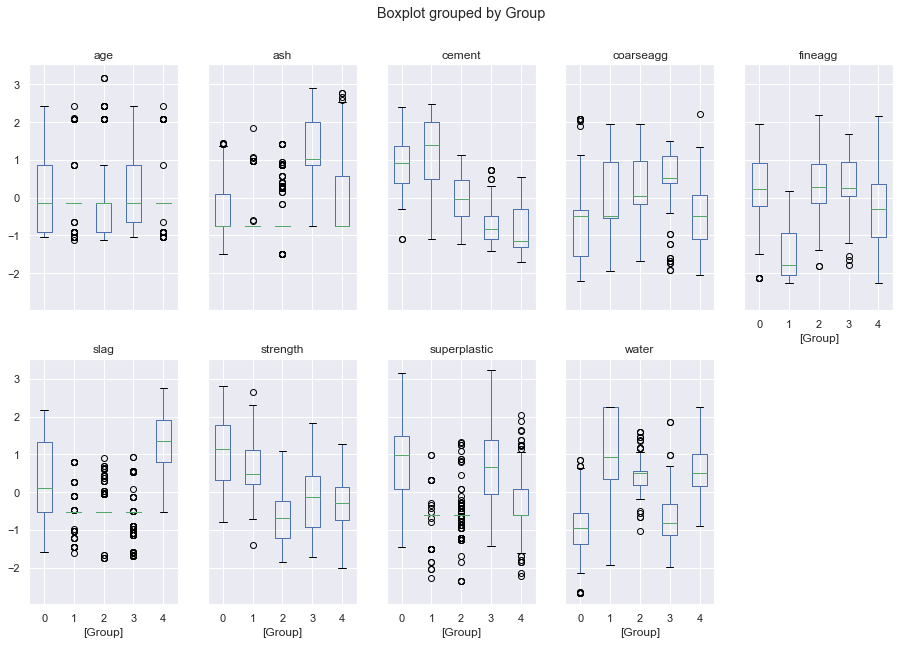

In [45]:
# using BoxPlot to check individual group data spread
df_concretz.boxplot(by = 'Group',  layout=(2,5), figsize=(15, 10));


- Outliers are visible most of the Group

In [46]:
# Handling Outlier seen in previous BoxPlot
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

df_concretz_corrected = (df_concretz.groupby('Group').transform(replace)) 
concat_data = df_concretz_corrected.join(pd.DataFrame(df_concretz['Group']))


C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


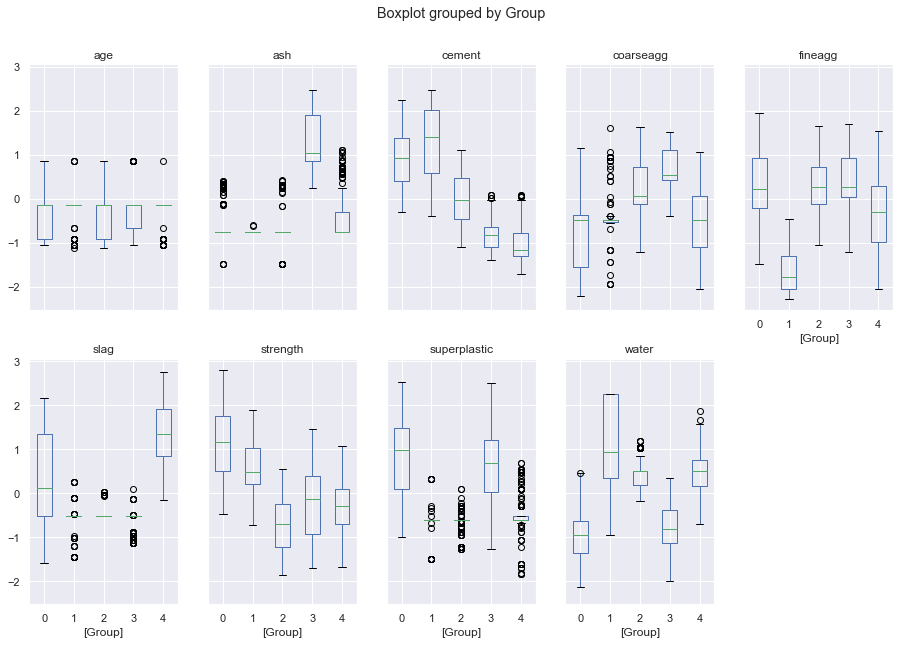

In [47]:
# Reto Boxplot to check Outliers
concat_data.boxplot(by = 'Group', layout=(2,5), figsize=(15, 10));

Outliers are visible but they seems to in the vicinity of the whiskers so acceptance is best instead of modification

### Analysis of Strenght(Target) attributes with other attributes

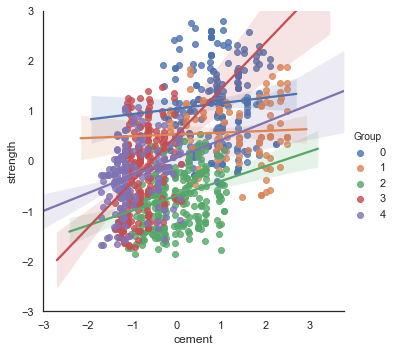

In [48]:
# strenght vs Cement

varibale='cement'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Cement would be best predictor for Strenght of Concrete as  no line found horizontal 

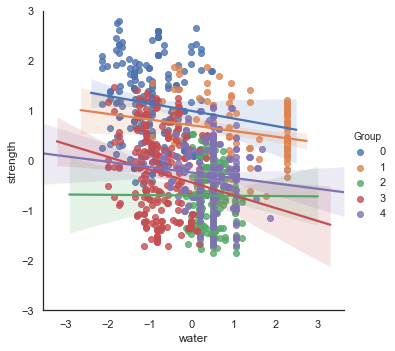

In [49]:
# strenght vs water

varibale='water'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Water attribute may not be good predictor for strengh of concrete as line are seems to parallel with x axis

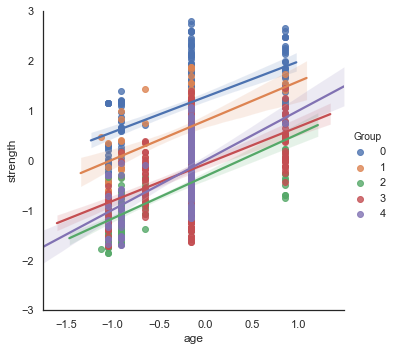

In [50]:
# strenght vs age

varibale='age'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

age attribute ditribution is non scattered and most ditribution is parralel to strengh axis, so it is poor predictor for strenght

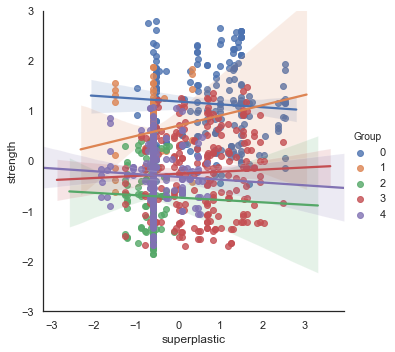

In [51]:
# strenght vs superplastic

varibale='superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Super Plasticizer showing poor relationship Strenght of concrete

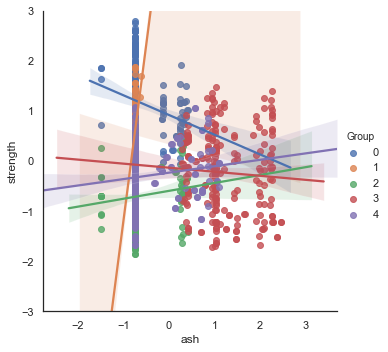

In [52]:
# strenght vs Ash
varibale='ash'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Non Corelative with Strenght

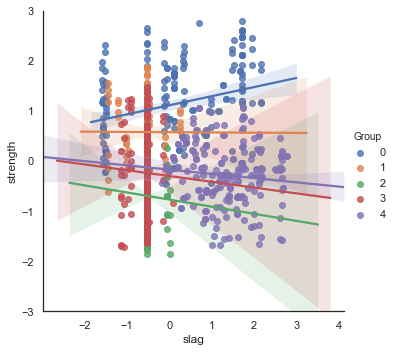

In [53]:

# strenght vs Slag attributes
varibale='slag'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Bast furnace Slag is showing weak relationship strenght of concrete.

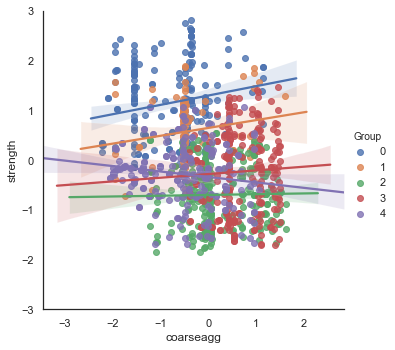

In [54]:
# strenght vs Coarse Agg
varibale='coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Coarse Agg is weak predictor for strenght

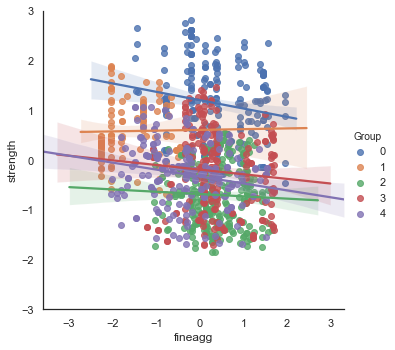

In [55]:
# strenght vs fine agg
varibale='fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(varibale,'strength',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

Fine aggregator are weak predictor for Strenght as  line is parallel and scatter formation in non clody in nature.
**"Need to further analysis using Decission Tree Regressor as all above attribute does have important role in strenght of cement and need identify most important attributes for higher role in concrete strenght."**

### 9. Decission Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
regressor = DecisionTreeRegressor()

regressor.fit(X_train , y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
feature_importances = regressor.feature_importances_
feature_importances
print('Feature importances: \n',pd.DataFrame(feature_importances,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.334281
slag          0.058538
ash           0.035946
water         0.112296
superplastic  0.050607
coarseagg     0.042499
fineagg       0.037330
age           0.328504


Cement, Water and Age are to be importatnt feature and remaining doesn't have significant relation.

In [59]:
yDT_pred = regressor.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


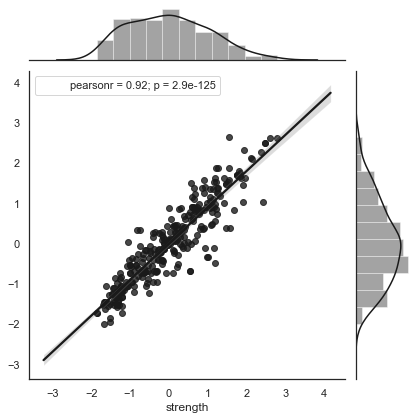

In [60]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=yDT_pred, stat_func=pearsonr, kind="reg", color="k");



In [61]:
Accuracy2=regressor.score(X_test, y_test)
print('Performance of Decission Tree Regressor on training data :',regressor.score(X_train,y_train))
# performance on test data
print('Performance of Decission Tree Regressor on Testing data :',Accuracy2)

Performance of Decission Tree Regressor on training data : 0.9917907390469387
Performance of Decission Tree Regressor on Testing data : 0.8389964956104848


In [62]:
DTR = pd.DataFrame({'Model':['Decission Tree Regressor'], 'Accuracy': [Accuracy2]},index={'4'})
results = pd.concat([results, DTR])
results = results[['Model', 'Accuracy']]

### Iteration 2( Decission Tree)

Drop columns except Cement, Water & age.


In [63]:
X2 = X.drop( ['slag','ash', 'superplastic', 'coarseagg', 'fineagg' ] , axis=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=1)

In [64]:
regressor.fit(X2_train , y_train)
yDT2_pred = regressor.predict(X2_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X2_train.columns))

             Imp
cement  0.430478
water   0.228461
age     0.341061


C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


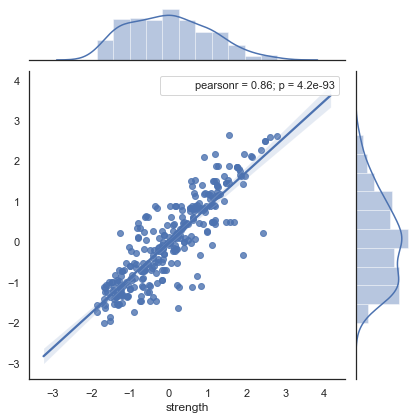

In [65]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=yDT2_pred, stat_func=pearsonr, kind="reg", color="b");

- Performance of model weak after dropping non significant column

In [67]:
Accuracy3=regressor.score(X2_test, y_test)
print('Performance of Decission Tree Regressor after iteration on training data :',regressor.score(X2_train,y_train))
# performance on test data
print('Performance of Decission Tree Regressor after iteration on Testing data :',Accuracy3)

Performance of Decission Tree Regressor after iteration on training data : 0.9856977868921643
Performance of Decission Tree Regressor after iteration on Testing data : 0.7234085913025287


In [68]:
DTR2 = pd.DataFrame({'Model':['Decission Tree Regressor IT2'], 'Accuracy': [Accuracy3]},index={'5'})
results = pd.concat([results, DTR2])
results = results[['Model', 'Accuracy']]

### 3 K Fold on Decssion Tree

In [69]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
DT_kfold=cross_val_score(regressor,X,y, cv=kfold)
Accuracydt=np.mean(abs(DT_kfold))
print('Average accuracy: ',Accuracydt)
print('Standard Deviation: ',DT_kfold.std())
DT_kfold = pd.DataFrame({'Model':['Decission Tree K Fold'], 'Accuracy': [Accuracydt]},index={'6'})
results = pd.concat([results, DT_kfold])
results = results[['Model', 'Accuracy']]

Average accuracy:  0.8559826889926974
Standard Deviation:  0.04289287276801483


C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Decission Tree Pruning

In [70]:
regressor_prune = DecisionTreeRegressor(min_samples_leaf=5, max_depth=4,random_state=1)

regressor_prune.fit(X_train , y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [71]:
feature_importances1 = regressor_prune.feature_importances_
feature_importances1
print('Feature importances: \n',pd.DataFrame(feature_importances1,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.418973
slag          0.022229
ash           0.000000
water         0.127203
superplastic  0.015080
coarseagg     0.010447
fineagg       0.007830
age           0.398238


- Cement, Water and age attribute feature importance value increaed after prunning

In [72]:
yydp_pred = regressor_prune.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


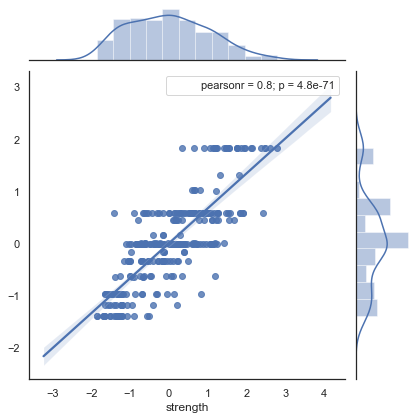

In [73]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=yydp_pred, stat_func=pearsonr, kind="reg", color="b");

- Distribution in non linear with multiple Guassian

In [74]:
Accuracy4=regressor_prune.score(X_test, y_test)

print('Performance of Decission Tree Regressor (Pruned) on training data :',regressor_prune.score(X_train,y_train))
# performance on test data
print('Performance of Decission Tree Regressor(Pruned) on Testing data :',Accuracy4)

Performance of Decission Tree Regressor (Pruned) on training data : 0.7220830016761699
Performance of Decission Tree Regressor(Pruned) on Testing data : 0.6441514775378021


In [75]:
decission_tree_prun= pd.DataFrame({'Model':['Decission Tree Regressor( Prune)'], 'Accuracy': [Accuracy4]},index={'7'})
results = pd.concat([results, decission_tree_prun])
results = results[['Model', 'Accuracy']]

- Accuracy of model reduced after prunning of decission Tree 

### K Fold validation on Pruned Decission Tree

In [76]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
prun_kfold=cross_val_score(regressor_prune,X,y, cv=kfold)
Accuracyp=np.mean(abs(prun_kfold))
print('Average accuracy: ',Accuracyp)
print('Standard Deviation: ',prun_kfold.std())
prune_kfold = pd.DataFrame({'Model':['Decission Tree(Pruned) K Fold'], 'Accuracy': [Accuracyp]},index={'8'})
results = pd.concat([results, prune_kfold])
results = results[['Model', 'Accuracy']]

Average accuracy:  0.6786635897520993
Standard Deviation:  0.06475977766558645


C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### 11. Random Forest Regression

In [77]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
yrf_pred = rf_model.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


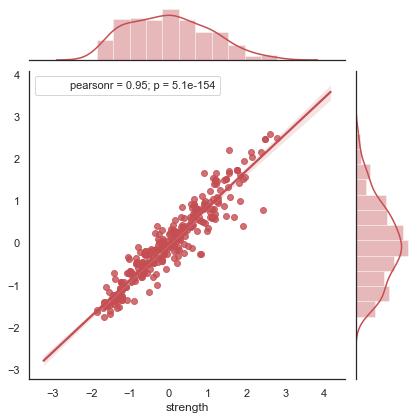

In [79]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=yrf_pred, stat_func=pearsonr, kind="reg", color="r");

- Pearson Correlation value found 95 % and distribution of data in Linear form

In [80]:
Accuracy5=rf_model.score(X_test, y_test)
print('Performance of Decission Tree Regressor (Pruned) on training data :',rf_model.score(X_train,y_train))
# performance on test data
print('Performance of Decission Tree Regressor(Pruned) on Testing data :',Accuracy5)

Performance of Decission Tree Regressor (Pruned) on training data : 0.9780704259700191
Performance of Decission Tree Regressor(Pruned) on Testing data : 0.8962284718850586


In [81]:
rf= pd.DataFrame({'Model':['Random Forest'], 'Accuracy': [Accuracy5]},index={'9'})
results = pd.concat([results, rf])
results = results[['Model', 'Accuracy']]

### K Fold on Random Forest Regression Model

In [82]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
rf_kfold=cross_val_score(rf_model,X,y, cv=kfold)
Accuracyrf=np.mean(abs(rf_kfold))
print('Average accuracy: ',Accuracyrf)
print('Standard Deviation: ',rf_kfold.std())
rfcv_kfold = pd.DataFrame({'Model':['Random Forest K Fold'], 'Accuracy': [Accuracyrf]},index={'10'})
results = pd.concat([results, rfcv_kfold])
results = results[['Model', 'Accuracy']]

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9023805654650513
Standard Deviation:  0.028215102212229264


### 12. Gradient Boost Regressor

In [83]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
ygb_pred = gb_model.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


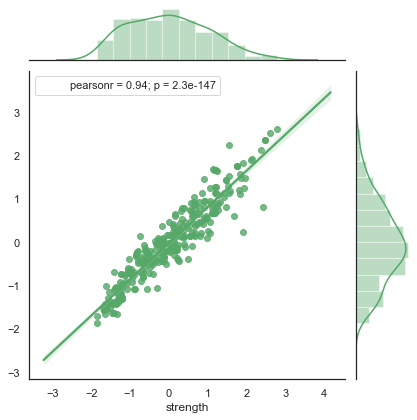

In [85]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=ygb_pred, stat_func=pearsonr, kind="reg", color="g");

- Pearson Correlation value found 94 % and distribution of data in Linear form

In [86]:
Accuracy6=gb_model.score(X_test, y_test)
print('Performance of Gradient Boosting on training data :',gb_model.score(X_train,y_train))
# performance on test data
print('Performance ofGradient Boosting on Testing data :',Accuracy6)

Performance of Gradient Boosting on training data : 0.9377380592980459
Performance ofGradient Boosting on Testing data : 0.8833462694410593


In [87]:
gb= pd.DataFrame({'Model':['Gradient Boosting Regressor'], 'Accuracy': [Accuracy6]},index={'11'})
results = pd.concat([results, gb])
results = results[['Model', 'Accuracy']]

### K Fold Validation for Gradient Boosting

In [88]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
gb_kfold=cross_val_score(gb_model,X,y, cv=kfold)
Accuracygb=np.mean(abs(gb_kfold))
print('Average accuracy: ',Accuracygb)
print('Standard Deviation: ',gb_kfold.std())
gbcv_kfold = pd.DataFrame({'Model':['Gradient Boosting K Fold'], 'Accuracy': [Accuracygb]},index={'12'})
results = pd.concat([results, gbcv_kfold])
results = results[['Model', 'Accuracy']]

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8859890846271601
Standard Deviation:  0.02015547740419472


### 13. Ada Boosting Regressor

In [89]:
ab_model=AdaBoostRegressor()
ab_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [90]:
yab_pred = ab_model.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


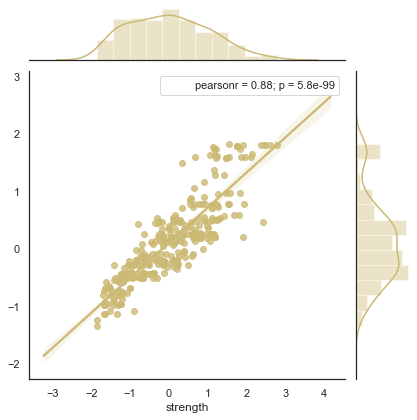

In [91]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=yab_pred, stat_func=pearsonr, kind="reg", color="y");

In [92]:
Accuracy7=ab_model.score(X_test, y_test)
print('Performance of Ada Boosting on training data :',gb_model.score(X_train,y_train))
# performance on test data
print('Performance of Ada Boosting on Testing data :',Accuracy7)

Performance of Ada Boosting on training data : 0.9377380592980459
Performance of Ada Boosting on Testing data : 0.72462014563187


In [93]:
ab= pd.DataFrame({'Model':['Ada Boosting Regressor'], 'Accuracy': [Accuracy7]},index={'13'})
results = pd.concat([results, ab])
results = results[['Model', 'Accuracy']]

### K Fold on Ada Boosting

In [94]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
ab_kfold=cross_val_score(ab_model,X,y, cv=kfold)
Accuracyab=np.mean(abs(ab_kfold))
print('Average accuracy: ',Accuracyab)
print('Standard Deviation: ',ab_kfold.std())
abcv_kfold = pd.DataFrame({'Model':['Ada Boosting K Fold'], 'Accuracy': [Accuracyab]},index={'14'})
results = pd.concat([results, abcv_kfold])
results = results[['Model', 'Accuracy']]

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7568220190875505
Standard Deviation:  0.03696034004503862


### 14. Bagging Regressor

In [95]:
br_model=BaggingRegressor()
br_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [96]:
ybr_pred=br_model.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


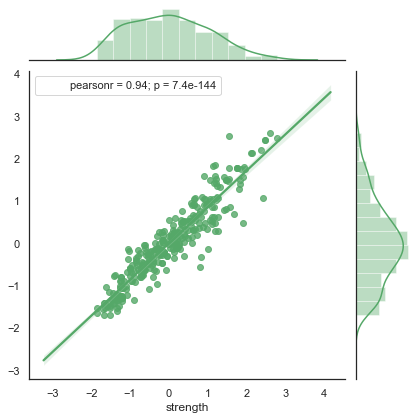

In [97]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=ybr_pred, stat_func=pearsonr, kind="reg", color="g");

In [98]:
Accuracy8=br_model.score(X_test, y_test)
print('Performance of Bagging Regressor on training data :',br_model.score(X_train,y_train))
# performance on test data
print('Performance of Ada Boosting on Testing data :',Accuracy8)

Performance of Bagging Regressor on training data : 0.9694316288667616
Performance of Ada Boosting on Testing data : 0.8800957966851679


In [99]:
br= pd.DataFrame({'Model':['Bagging Regressor'], 'Accuracy': [Accuracy8]},index={'15'})
results = pd.concat([results, br])
results = results[['Model', 'Accuracy']]

### K Fold on Bagging Regressor

In [100]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
br_kfold=cross_val_score(br_model,X,y, cv=kfold)
Accuracybr=np.mean(abs(br_kfold))
print('Average accuracy: ',Accuracybr)
print('Standard Deviation: ',br_kfold.std())
brcv_kfold = pd.DataFrame({'Model':['Bagging Regressor K Fold'], 'Accuracy': [Accuracybr]},index={'16'})
results = pd.concat([results, brcv_kfold])
results = results[['Model', 'Accuracy']]

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8847164177596433
Standard Deviation:  0.031712689748048424


### 15. KNN Regressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [103]:
ky_pred=knn.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


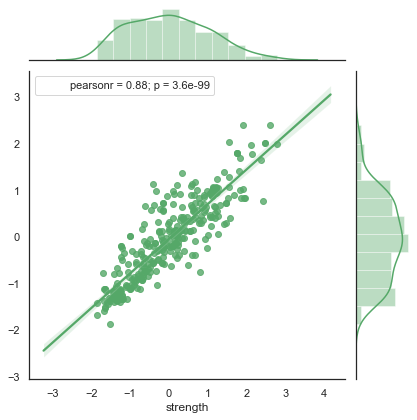

In [104]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=ky_pred, stat_func=pearsonr, kind="reg", color="g");

In [105]:
Accuracy9=knn.score(X_test, y_test)
print('Performance of KNN on training data :',knn.score(X_train,y_train))
# performance on test data
print('Performance of KNN on Testing data :',Accuracy9)

Performance of KNN on training data : 0.8480540849636041
Performance of KNN on Testing data : 0.7640351494401245


In [106]:
kn= pd.DataFrame({'Model':['KNN Regressor'], 'Accuracy': [Accuracy9]},index={'17'})
results = pd.concat([results, kn])
results = results[['Model', 'Accuracy']]

### K Fold on KNN

In [107]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
knn_kfold=cross_val_score(knn,X,y, cv=kfold)
Accuracyknn=np.mean(abs(knn_kfold))
print('Average accuracy: ',Accuracyknn)
print('Standard Deviation: ',knn_kfold.std())
knncv_kfold = pd.DataFrame({'Model':['KNN K Fold'], 'Accuracy': [Accuracyknn]},index={'18'})
results = pd.concat([results, knncv_kfold])
results = results[['Model', 'Accuracy']]

Average accuracy:  0.7622081897386304
Standard Deviation:  0.04490754769999743


C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### 16. Linear Regression Model and Polynomial Feature


In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [109]:
X3=df_concret.drop('strength',axis=1)
y3=df_concret['strength']

In [110]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=1)

In [111]:
regression_model = LinearRegression()
regression_model.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
regression_model.coef_

array([ 0.06469641,  0.03539829, -0.01800756, -0.35458139,  0.09841193,
       -0.04882968, -0.06080978,  0.31464202])

In [113]:
intercept = regression_model.intercept_

intercept

163.53577466536473

In [114]:
y3_pred = regression_model.predict(X3_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


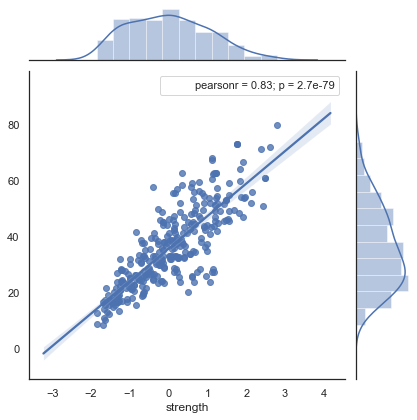

In [115]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y3_pred, stat_func=pearsonr, kind="reg", color="b");

In [116]:
Accuracy10=regression_model.score(X3_test, y3_test)
print('Performance of Linear Regression on training data :',regression_model.score(X3_train,y3_train))
# performance on test data
print('Performance of  Linear Regression on Testing data :',Accuracy10)

Performance of Linear Regression on training data : 0.7055905216434636
Performance of  Linear Regression on Testing data : 0.6862058824167103


In [117]:
LR = pd.DataFrame({'Model':['Linear Regression'], 'Accuracy': [Accuracy10]},index={'19'})
results = pd.concat([results, LR])
results = results[['Model', 'Accuracy']]

### 17.RIDGE, LASSO and Linear Model with Scaled Data

## Ridge Model

In [118]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X3)
X_scaled = pd.DataFrame(X_scaled, columns=X3.columns)  

y_scaled = preprocessing.scale(y3)
y_scaled = pd.DataFrame(y_scaled)

In [119]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [120]:
ridge = Ridge(alpha=.3)
ridge.fit(X4_train,y4_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 0.40472367  0.10971054 -0.0429696  -0.43682636  0.01538862 -0.2270214
  -0.28612328  0.52342429]]


In [121]:
y4_pred = ridge.predict(X4_test)

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


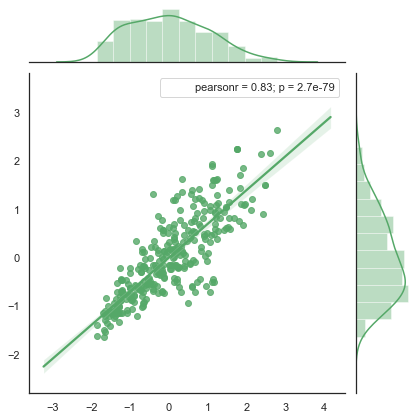

In [122]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y4_test, y=y4_pred, stat_func=pearsonr, kind="reg", color="g");

In [123]:
Accuracy11=ridge.score(X4_test, y4_test)
print('Performance of Ridge model on training data :',ridge.score(X4_train,y4_train))
# performance on test data
print('Performance of  Ridge model on Testing data :',Accuracy11)


Performance of Ridge model on training data : 0.7055903131401791
Performance of  Ridge model on Testing data : 0.6862095012763851


In [124]:
rdg = pd.DataFrame({'Model':['Ridge'], 'Accuracy': [Accuracy11]},index={'20'})
results = pd.concat([results, rdg])
results = results[['Model', 'Accuracy']]

In [125]:
lasso = Lasso(alpha=0.1)
lasso.fit(X4_train,y4_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.39861578  0.06141039 -0.         -0.20246796  0.0082892  -0.06287291
 -0.05955969  0.41057848]


In [126]:
y_lasso_pred = lasso.predict(X4_test)

In [127]:
#sns.set(style="darkgrid", color_codes=True)   
#with sns.axes_style("white"):
   # sns.jointplot(x=y4_test, y=y_lasso_pred, stat_func=pearsonr, kind="reg", color="g");
    

In [128]:
Accuracy12=lasso.score(X4_test, y4_test)
print('Performance of Lasso model on training data :',lasso.score(X4_train,y4_train))
# performance on test data
print('Performance of  Ridge model on Testing data :',Accuracy12)


Performance of Lasso model on training data : 0.6226710421557882
Performance of  Ridge model on Testing data : 0.5803198191444336


In [129]:
Lasso = pd.DataFrame({'Model':['Lasso'], 'Accuracy': [Accuracy12]},index={'21'})
results = pd.concat([results, Lasso])
results = results[['Model', 'Accuracy']]

In [130]:
regression_model.fit(X4_train, y4_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y4_Liner_pred = regression_model.predict(X4_test)

In [132]:
#sns.set(style="darkgrid", color_codes=True)   
#with sns.axes_style("white"):
 #   sns.jointplot(x=y4_test, y=y4_Liner_pred , stat_func=pearsonr, kind="reg", color="g");

In [133]:
Accuracy13=regression_model.score(X4_test, y4_test)
print('Performance of Linear Regression(Scaled) model on training data :',regression_model.score(X4_train,y4_train))
# performance on test data
print('Performance of  Linear Regression(Scaled) model on Testing data :',Accuracy13)

Performance of Linear Regression(Scaled) model on training data : 0.7055905216434635
Performance of  Linear Regression(Scaled) model on Testing data : 0.6862058824167103


In [134]:
LR_Scaled = pd.DataFrame({'Model':['Linear Regression(Scaled)'], 'Accuracy': [Accuracy13]},index={'22'})
results = pd.concat([results, LR_Scaled])
results = results[['Model', 'Accuracy']]

 - Perfromance of Linear, Ridge and Lasso model is seem in range of 68 % accurate attract application polynomial feature.

### Polynomial Model( Quadratic and Higher)

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
# Quadratic function
poly = PolynomialFeatures(degree = 2, interaction_only=True)



In [137]:
X_poly = poly.fit_transform(X_scaled)
X5_train, X5_test, y5_train, y5_test = train_test_split(X_poly, y3, test_size=0.30, random_state=1)
X5_train.shape

(721, 37)

- Date frmame increaed after polynomial feature application

### Simple Linear Model on Poly Feature

In [138]:
regression_model.fit(X5_train, y5_train)
Accuracy14=regression_model.score(X5_test, y5_test)
print('Performance of Linear Regression(Poly Degre 2) model on training data :',regression_model.score(X5_train,y5_train))
# performance on test data
print('Performance of  Linear Regression(Poly Degre 2) model on Testing data :',Accuracy14)

Performance of Linear Regression(Poly Degre 2) model on training data : 0.7635785275633855
Performance of  Linear Regression(Poly Degre 2) model on Testing data : 0.7300169846740091


In [139]:
LR_Poly = pd.DataFrame({'Model':['Linear Regression(Poly(2))'], 'Accuracy': [Accuracy14]},index={'23'})
results = pd.concat([results, LR_Poly])
results = results[['Model', 'Accuracy']]

In [140]:
rdge=Ridge(alpha=.3)
rdge.fit(X5_train,y5_train)
Accuracy15=rdge.score(X5_test, y5_test)
print('Performance of Ridge(Poly Degre 2) model on training data :',rdge.score(X5_train,y5_train))
# performance on test data
print('Performance of  Ridge(Poly Degre 2) model on Testing data :',Accuracy15)

Performance of Ridge(Poly Degre 2) model on training data : 0.7635766761295127
Performance of  Ridge(Poly Degre 2) model on Testing data : 0.7301190150869085


In [141]:
rdge_Poly = pd.DataFrame({'Model':['Ridge(Poly(2))'], 'Accuracy': [Accuracy15]},index={'24'})
results = pd.concat([results, rdge_Poly])
results = results[['Model', 'Accuracy']]

In [142]:
lasso.fit(X5_train,y5_train)
Accuracy16=lasso.score(X5_test, y5_test)
print('Performance of Lasso(Poly Degre 2) model on training data :',lasso.score(X5_train,y5_train))
# performance on test data
print('Performance of  Lasso(Poly Degre 2) model on Testing data :',Accuracy16)

Performance of Lasso(Poly Degre 2) model on training data : 0.7546733210235392
Performance of  Lasso(Poly Degre 2) model on Testing data : 0.726953278842591


In [143]:
lasso_Poly = pd.DataFrame({'Model':['Lasso (Poly(2))'], 'Accuracy': [Accuracy16]},index={'25'})
results = pd.concat([results, lasso_Poly])
results = results[['Model', 'Accuracy']]

- Score of Linear, Lasso & Ridge model improved after applying polynomial feature

### Polynomial Feature with Degree 3

In [144]:
poly3 = PolynomialFeatures(degree = 3, interaction_only=True)

In [145]:
X_poly3 = poly3.fit_transform(X_scaled)
X6_train, X6_test, y6_train, y6_test = train_test_split(X_poly3, y3, test_size=0.30, random_state=1)
X6_train.shape

(721, 93)

In [146]:
regression_model.fit(X6_train, y6_train)
Accuracy17=regression_model.score(X6_test, y6_test)
print('Performance of Linear Regression (Poly Degre 3) model on training data :',regression_model.score(X6_train,y6_train))
# performance on test data
print('Performance of  Linear Regression(Poly Degre 3) model on Testing data :',Accuracy17)
LR_3Poly = pd.DataFrame({'Model':['Linear Regression (Poly(3))'], 'Accuracy': [Accuracy17]},index={'26'})
results = pd.concat([results, LR_3Poly])
results = results[['Model', 'Accuracy']]

Performance of Linear Regression (Poly Degre 3) model on training data : 0.8088497173139139
Performance of  Linear Regression(Poly Degre 3) model on Testing data : 0.7396999558024748


In [147]:
ridge.fit(X6_train, y6_train)
Accuracy18 =ridge.score(X6_test, y6_test)
print('Performance of Ridge (Poly Degre 3) model on training data :',ridge.score(X6_train,y6_train))
# performance on test data
print('Performance of  Ridge(Poly Degre 3) model on Testing data :',Accuracy17)
ridge_3Poly = pd.DataFrame({'Model':['Ridge (Poly(3))'], 'Accuracy': [Accuracy17]},index={'27'})
results = pd.concat([results, ridge_3Poly])
results = results[['Model', 'Accuracy']]

Performance of Ridge (Poly Degre 3) model on training data : 0.8088416192728239
Performance of  Ridge(Poly Degre 3) model on Testing data : 0.7396999558024748


In [148]:
lasso.fit(X6_train, y6_train)
Accuracy18=lasso.score(X6_test, y6_test)
print('Performance of Lasso (Poly Degre 3) model on training data :',lasso.score(X6_train,y6_train))
# performance on test data
print('Performance of  Lasso(Poly Degre 3) model on Testing data :',Accuracy18)
lasso_3Poly = pd.DataFrame({'Model':['Lasso (Poly(3))'], 'Accuracy': [Accuracy18]},index={'28'})
results = pd.concat([results, lasso_3Poly])
results = results[['Model', 'Accuracy']]


Performance of Lasso (Poly Degre 3) model on training data : 0.7905233773609436
Performance of  Lasso(Poly Degre 3) model on Testing data : 0.7403661910348954


- Minor change( Improvement) Linear, Lasso and Ridge with Poly feature degree 3.

### Polynomial Feature with Degree 4

In [149]:
poly4 = PolynomialFeatures(degree = 4, interaction_only=True)

In [150]:
X_poly4 = poly4.fit_transform(X_scaled)
X7_train, X7_test, y7_train, y7_test = train_test_split(X_poly4, y3, test_size=0.30, random_state=1)
X7_train.shape

(721, 163)

In [151]:
regression_model.fit(X7_train, y7_train)
Accuracy19=regression_model.score(X7_test, y7_test)
print('Performance of Linear Regression (Poly Degre 4) model on training data :',regression_model.score(X7_train,y7_train))
# performance on test data
print('Performance of  Linear Regression(Poly Degre 4) model on Testing data :',Accuracy19)
l_4Poly = pd.DataFrame({'Model':['Linear Regression (Poly(4))'], 'Accuracy': [Accuracy19]},index={'29'})
results = pd.concat([results, l_4Poly])
results = results[['Model', 'Accuracy']]


Performance of Linear Regression (Poly Degre 4) model on training data : 0.8379833658838015
Performance of  Linear Regression(Poly Degre 4) model on Testing data : 0.716364195624229


In [152]:
ridge.fit(X7_train, y7_train)
Accuracy20=ridge.score(X7_test, y7_test)
print('Performance of Ridge (Poly Degre 4) model on training data :',ridge.score(X7_train,y7_train))
# performance on test data
print('Performance of  Ridge(Poly Degre 4) model on Testing data :',Accuracy20)
r_4Poly = pd.DataFrame({'Model':[['Ridge(Poly(4))']], 'Accuracy': [Accuracy20]},index={'30'})
results = pd.concat([results, r_4Poly])
results = results[['Model', 'Accuracy']]

Performance of Ridge (Poly Degre 4) model on training data : 0.8377152386845286
Performance of  Ridge(Poly Degre 4) model on Testing data : 0.7356090221486885


In [153]:
lasso.fit(X7_train, y7_train)
Accuracy21=lasso.score(X7_test, y7_test)
print('Performance of Lasso (Poly Degre 4) model on training data :',lasso.score(X7_train,y7_train))
# performance on test data
print('Performance of  Lasso(Poly Degre 4) model on Testing data :',Accuracy21)
la_4Poly = pd.DataFrame({'Model':[['Lasso (Poly(4))']], 'Accuracy': [Accuracy21]},index={'31'})
results = pd.concat([results, la_4Poly])
results = results[['Model', 'Accuracy']]


Performance of Lasso (Poly Degre 4) model on training data : 0.8066674123627433
Performance of  Lasso(Poly Degre 4) model on Testing data : 0.7556643628058777


- No significant improvement after applying polynomial feature with degree on data

In [154]:
# Displaying Final result Chart
results

,Model,Accuracy
1,SVM SVR,0.674059
2,SVR IT2,0.672915
3,SVR K Fold,0.680887
4,Decission Tree Regressor,0.838996
5,Decission Tree Regressor IT2,0.723409
6,Decission Tree K Fold,0.855983
7,Decission Tree Regressor( Prune),0.644151
8,Decission Tree(Pruned) K Fold,0.678664
9,Random Forest,0.896228
10,Random Forest K Fold,0.902381


- After doing extensive work of model applying on data set, we found that Random Forest score is 89.62 % which is highest among the all model, followed by Gradient Boosting Regressor having score of 88.33 % and Bagging regressor having significant score of 88.00 %

### Bootstrap Sampling

In [155]:
data=df_concretz.values

In [156]:
Iteration = 1000

In [157]:
size=int(len(df_concretz)*1) # Picking up 100 % data

In [158]:
from sklearn.utils import resample

### Fit Random Forest Regressor

In [159]:
stats = list()   
for i in range(Iteration):
    # prepare train and test sets
    train = resample(data, n_samples=size)  # Sampling with replacement 
    test = np.array([x for x in data if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    rfr = RandomForestRegressor( n_estimators=50)
    # fit against independent variables and corresponding target values
    rfr.fit(train[:,:8], train[:,8]) 
    # Take the target column for all rows in test set
    y_test = test[:,8]    
    # evaluate model
    # predict based on independent variables in the test data
    score =  rfr.score(test[:, :8] , y_test)
    predictions = rfr.predict(test[:, :8])  

    stats.append(score)

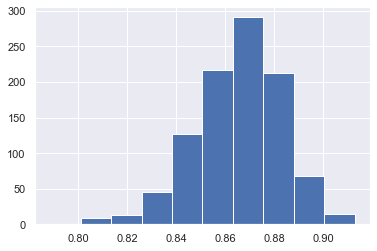

95.0% confidence interval is 82.8% and 89.7%


In [160]:
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p2 = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p2))  
p2 = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p2))
print('%.1f%% confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Fit Gradient Boosting Regressor

In [161]:
stats = list()   
for i in range(Iteration):
    # prepare train and test sets
    train = resample(data, n_samples=size)  # Sampling with replacement 
    test = np.array([x for x in data if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    gbr = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbr.fit(train[:,:8], train[:,8]) 
    # Take the target column for all rows in test set
    y_test = test[:,8]    
    # evaluate model
    # predict based on independent variables in the test data
    score =  gbr.score(test[:, :8] , y_test)
    predictions =  gbr.predict(test[:, :8])  

    stats.append(score)

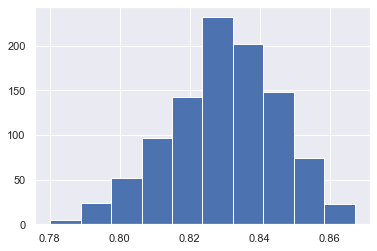

95.0% confidence interval is 79.7% and 85.8%


In [162]:
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p2 = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p2))  
p2 = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p2))
print('%.1f%% confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Fit Bagging Regressor

In [163]:
stats = list()   
for i in range(Iteration):
    # prepare train and test sets
    train = resample(data, n_samples=size)  # Sampling with replacement 
    test = np.array([x for x in data if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    br = BaggingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    br.fit(train[:,:8], train[:,8]) 
    # Take the target column for all rows in test set
    y_test = test[:,8]    
    # evaluate model
    # predict based on independent variables in the test data
    score =  gbr.score(test[:, :8] , y_test)
    predictions =  gbr.predict(test[:, :8])  

    stats.append(score)

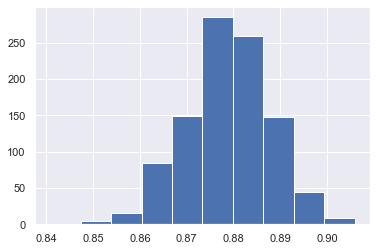

95.0% confidence interval is 86.1% and 89.5%


In [164]:
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p2 = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p2))  
p2 = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p2))
print('%.1f%% confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

**Conclusion**:
Bootstrap Random Forest Regressor is best Model and recommnded for Production due having best 95 % confidence interval

Thanks for Evaluationg 